import numpy and pyJHTDB stuff

In [1]:
import numpy as np
import pyJHTDB
from pyJHTDB.dbinfo import mhd1024, isotropic1024coarse
from pyJHTDB import libJHTDB
import time as tt
#import mkl_fft

now import matplotlib and require plots to be shown inline

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

3D fft demo: generating artificial flow field, doing fft and computing energy

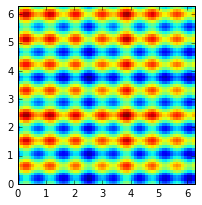

In [3]:
dim=64
L=2*np.pi

x=np.linspace(0,L,dim+1)
x=x[:-1]
X,Y,Z = np.meshgrid(x, x, x)
# three wave numbers: 2, 4 and 7
u=2*np.sin(2*X)+np.sin(4*X)+5*np.sin(7*X)+2*np.sin(2*Y)+np.sin(4*Y)+5*np.sin(7*Y)+2*np.sin(2*Z)+np.sin(4*Z)+5*np.sin(7*Y);
v=u;
w=u;

# how it looks like?
fig = plt.figure(figsize = (7, 7))
a = fig.add_subplot(121)
a.imshow(u[:,:,0],
         extent = [0, L, 0, L],
         interpolation = 'none')

uu_fft=np.fft.fftn(u)
vv_fft=np.fft.fftn(v)
ww_fft=np.fft.fftn(w)

muu=(np.abs(uu_fft)/dim**3)**2
mvv=(np.abs(vv_fft)/dim**3)**2
mww=(np.abs(ww_fft)/dim**3)**2

Integral over sphere

In [4]:
k_end=int(dim/2)
rx=np.array(range(dim))-dim/2+1
rx=np.roll(rx,int(dim/2)+1)

X,Y,Z = np.meshgrid(rx, rx, rx)
r=np.sqrt(X**2+Y**2+Z**2)

dx=2*np.pi/L
k=(np.array(range(k_end))+1)*dx

start = tt.time()
bins=np.zeros((k.shape[0]+1))
for N in range(k_end):
    if N==0:
        bins[N]=0
    else:
        bins[N]=(k[N]+k[N-1])/2    
bins[-1]=k[-1]

inds = np.digitize(r*dx, bins)
spectrum=np.zeros((k.shape[0]))
bin_counter=np.zeros((k.shape[0]))
for N in range(k_end):
    spectrum[N]=np.sum(muu[inds==N+1])+np.sum(mvv[inds==N+1])+np.sum(mww[inds==N+1])
    bin_counter[N]=np.count_nonzero(inds==N+1)

spectrum=spectrum*2*np.pi*(k**2)/(bin_counter*dx**3)
print(tt.time() - start)

0.1355607509613037


Plot spectrum

(0, 10)

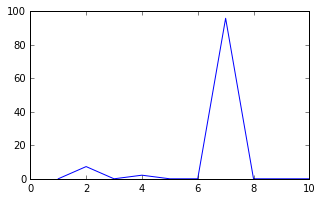

In [5]:
fig = plt.figure(figsize=(5, 3))
ax = fig.add_subplot(111)
ax.plot(k,spectrum)
plt.xlim(0,10)

3D fft demo: get entire data from one snapshot of isotropic1024coarse

In [6]:
lJHTDB = libJHTDB()
lJHTDB.initialize()

#Add token
auth_token  = "edu.jhu.pha.turbulence.testing-201311"  #Replace with your own token here
lJHTDB.add_token(auth_token)

start = tt.time()
zsize=16
result=np.zeros((1024,1024,1024,3))
print(int(round(1024/zsize)))
for t in range(int(round(1024/zsize))):
    print (t)
    start1 = tt.time()
    result[t*zsize:(t+1)*zsize,:,:,:] = lJHTDB.getRawData(
            9,
            start = np.array([0, 0, t*zsize], dtype = np.int),
            size  = np.array([1024, 1024, zsize], dtype = np.int),
            data_set = 'isotropic1024coarse',
            getFunction = 'Velocity')
    print(tt.time() - start1)
    
end = tt.time()
print(end - start)
lJHTDB.finalize()

64
0
22.104939699172974
1
23.74224305152893
2
27.96409511566162
3
28.79262900352478
4
22.673558473587036
5
27.28855609893799
6
20.46729612350464
7
28.452769994735718
8
22.848500728607178
9
29.56512451171875
10
25.319852828979492
11
34.89297008514404
12
20.38312554359436
13
19.935770273208618
14
27.20672082901001
15
23.055657386779785
16
22.067807912826538
17
23.710111379623413
18
18.50837755203247
19
20.156485557556152
20
22.85680627822876
21
22.114849090576172
22
23.298721075057983
23
19.467848300933838
24
20.15703058242798
25
19.58423352241516
26
25.687817335128784
27
26.63393259048462
28
26.594545364379883
29
24.601664066314697
30
21.939273834228516
31
18.976014614105225
32
19.070495128631592
33
26.801418781280518
34
21.11579418182373
35
21.653977870941162
36
18.696680545806885
37
27.398367643356323
38
19.50436806678772
39
20.095831632614136
40
19.827566862106323
41
21.015212535858154
42
19.373238801956177
43
25.39528226852417
44
19.776066541671753
45
18.61150598526001
46
20.0894212

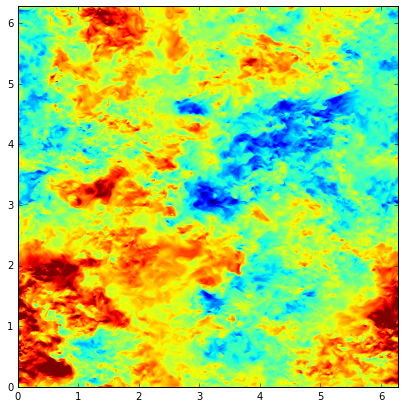

In [7]:
fig = plt.figure(figsize = (15, 15))
a = fig.add_subplot(121)
a.imshow(result[50,::1,::1,0],
         extent = [0, 3.14*2, 0, 3.14*2],
         vmin=-1.5, vmax=1.5)

Doing fft and computing energy

In [ ]:
skip=2
dim=int(round(1024/skip))
print(dim)
L=2*np.pi

start = tt.time()
uu_fft=np.fft.fftn(result[::skip,::skip,::skip,0])
vv_fft=np.fft.fftn(result[::skip,::skip,::skip,1])
ww_fft=np.fft.fftn(result[::skip,::skip,::skip,2])
print(tt.time() - start)

start = tt.time()
uu_fft=(np.abs(uu_fft)/dim**3)**2
vv_fft=(np.abs(vv_fft)/dim**3)**2
ww_fft=(np.abs(ww_fft)/dim**3)**2
print(tt.time() - start)

1024


Integral over sphere

In [9]:
k_end=int(dim/2)
rx=np.array(range(dim))-dim/2+1
rx=np.roll(rx,int(dim/2)+1)

#start = tt.time()
#r,Y,Z = np.meshgrid(rx, rx, rx)
#r=np.sqrt(r**2+Y**2+Z**2)
#print(tt.time() - start)
start = tt.time()
r=np.zeros((rx.shape[0],rx.shape[0],rx.shape[0]))
for i in range(rx.shape[0]):
    for j in range(rx.shape[0]):
            r[i,j,:]=rx[i]**2+rx[j]**2+rx[:]**2
r=np.sqrt(r)
print(tt.time() - start)

dx=2*np.pi/L
k=(np.array(range(k_end))+1)*dx

start = tt.time()
bins=np.zeros((k.shape[0]+1))
for N in range(k_end):
    if N==0:
        bins[N]=0
    else:
        bins[N]=(k[N]+k[N-1])/2    
bins[-1]=k[-1]

inds = np.digitize(r*dx, bins, right=True)
spectrum=np.zeros((k.shape[0]))
bin_counter=np.zeros((k.shape[0]))

for N in range(k_end):
    spectrum[N]=np.sum(uu_fft[inds==N+1])+np.sum(vv_fft[inds==N+1])+np.sum(ww_fft[inds==N+1])
    bin_counter[N]=np.count_nonzero(inds==N+1)

spectrum=spectrum*2*np.pi*(k**2)/(bin_counter*dx**3)
print(tt.time() - start)

4.830713987350464
866.2364239692688


Plot spectrum

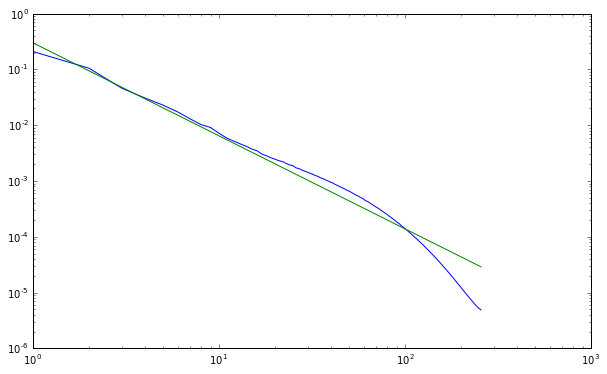

In [10]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(k,spectrum)
ax.plot(k,3e-1*k**(-5/3))
ax.set_xscale('log')
ax.set_yscale('log')